# Compiled Code Logic Simulator


### Custom classes for various logic gates

In [1]:
class notgate:
    """custom class for NOT gate node"""
    def __init__(self, a, y):
        self.a = a
        self.y = y
    
    def __repr__(self):
        return "NOT Gate"
    
    def ready(self, nets):
        """check if inputs are available"""
        return (nets[self.a] != 'u') 
    
    def evaluate(self, nets):
        """evaluate NOT gate node"""
        if nets[self.a] == 1:
            nets[self.y] = 0
        else:
            nets[self.y] = 1

class andgate:
    """custom class for AND gate node"""
    def __init__(self, a, b, y):
        self.a = a
        self.b = b
        self.y = y
    
    def __repr__(self):
        return "AND Gate"

    def ready(self, nets):
        """check if inputs are available"""
        return (nets[self.a] != 'u' and nets[self.b] != 'u') 

    def evaluate(self, nets):
        """evaluate AND gate node"""
        if(nets[self.a] and nets[self.b]):
            nets[self.y] = 1
        else:
            nets[self.y] = 0

class orgate:
    """custom class for OR gate node"""
    def __init__(self, a, b, y):
        self.a = a
        self.b = b
        self.y = y   
    
    def __repr__(self):
        return "OR Gate"
    
    def ready(self, nets):
        """check if inputs are available"""
        return (nets[self.a] != 'u' and nets[self.b] != 'u') 
 
    def evaluate(self, nets):
        """evaluate OR gate node"""
        if(nets[self.a] or nets[self.b]):
            nets[self.y] = 1
        else:
            nets[self.y] = 0

In [2]:
def get_input_output_nodes(filename):
    """returns the input and output nodes for the circuit netlist in ./filename as a tuple"""
    inputs = []
    outputs = []
    
    with open(filename, 'r') as t:
        gate_number = 0
        m = [x.split() for x in t.readlines()]
        for i in m:
            if(len(i) == 0):
                pass
            elif(i[0] == 'inp'):
                inputs = i[1:]
            elif(i[0] == 'outp'):
                outputs = i[1:]
            else:
                pass
    return (inputs, outputs)

def simulate(filename, testvector):
    """simulates the circuit stored at ./filename for an input of testvector and returns output vector"""
    inputs = []
    outputs = []

    nets = {}
    gates = {}

    # we will store all nets/nodes in hashable nets for fast lookup (make sure the nets are named differently and are not and, or, inv as gates named that way)
    # we will store all gates hashed by increasing numbers from 0 to no of gates - 1 for fast lookup  

    with open(filename, 'r') as t:
        gate_number = 0
        m = [x.split() for x in t.readlines()]
        for i in m:
            if(len(i) == 0):
                pass
            elif(i[0] == 'inp'):
                inputs = i[1:]
            elif(i[0] == 'outp'):
                outputs = i[1:]
            elif(i[0] == 'and'):
                for j in range(1,4):
                    if(i[j] not in nets.keys()):
                        nets[i[j]] = 'u'
                # instantiate the gate
                gates[gate_number] = andgate(i[1], i[2], i[3])
                gate_number += 1
            elif(i[0] == 'or'):
                for j in range(1,4):
                    if(i[j] not in nets.keys()):
                        nets[i[j]] = 'u'
                # instantiate the gate
                gates[gate_number] = orgate(i[1], i[2], i[3])
                gate_number += 1
            elif(i[0] == 'inv'):
                for j in range(1,3):
                    if(i[j] not in nets.keys()):
                        nets[i[j]] = 'u'
                # instantiate the gate
                gates[gate_number] = notgate(i[1], i[2])
                gate_number += 1
            else:
                pass
            
    # assign the testvector to input nets
    for i in range(len(testvector)):
        nets[inputs[i]] = testvector[i]
    
    # create a list of hash_keys of all gates which are yet to be simulated
    left_over_gates = list(range(len(gates.keys())))
    while(len(left_over_gates) > 0):
        # keep performing until no left over gates
        completed = []
        
        for i in left_over_gates:
            #check if a gate is ready to be evaluated if so add it to completed
            if(gates[i].ready(nets)):
                completed.append(i)
        
        for i in completed:
            # evaluate all gates in completed and remove them from left over gates
            gates[i].evaluate(nets)
            left_over_gates.remove(i)
    
    output_testvector = []
    
    for i in outputs:
        # perform a hash lookup for the output nodes to get the output corresponding to that net
        output_testvector.append(nets[i])
        
    #return the output vector
    return output_testvector

## The code henceforth evaluates the truth table for circuit netlist stored at `/circuit.txt` via Logic Simulation and to store it as `/truthtable.csv`

### For the netlist in `/circuit.txt` we are having the description of a 2X1 MUX with select S, inputs A and B and output Z

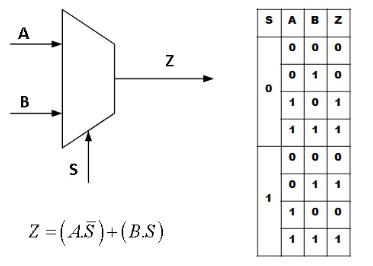

In [3]:
from itertools import product

inputs, outputs = get_input_output_nodes('circuit.txt')

# make a dict to store truth table
truthtable = {}

for j in range(len(inputs)):
    truthtable[inputs[j]] = []

for j in range(len(outputs)):
    truthtable[outputs[j]] = []

# list performs cartesian product no of input number of times to provide inputs of generic n variable truth table in order    
testvectors = list(product((0, 1), repeat=len(inputs)))

for i in testvectors:
    for j in range(len(i)):
        truthtable[inputs[j]].append(i[j])
    # simulate the ith truthtable entry
    v = simulate('circuit.txt', i)

    for j in range(len(v)):
        truthtable[outputs[j]].append(v[j])

In [4]:
import pandas as pd
from IPython.display import HTML

# use pandas to convert to csv and store
truthtable = pd.DataFrame(truthtable)
truthtable.to_csv("truthtable.csv", index=False)

# print out the truth table
print("The truth table for the circuit is given by")
HTML(truthtable.to_html(index=False))

The truth table for the circuit is given by


S,A,B,Z
0,0,0,0
0,0,1,0
0,1,0,1
0,1,1,1
1,0,0,0
1,0,1,1
1,1,0,0
1,1,1,1


### The above table is as expected for 2X1 MUX hence, the simulator simulates the logic perfectly